In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os
from os.path import isfile, join
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16


IMAGE_SIZE = [224, 224]


vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)


for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)

x = Dense(3, activation = 'softmax')(x)

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input,
                                    validation_split=0.2
                                    )

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input, validation_split=0.2)

training_generator = training_datagen.flow_from_directory("/content/drive/MyDrive/your_folder", target_size = IMAGE_SIZE,batch_size = 64, class_mode = 'categorical',subset='training', shuffle=True)
validation_generator = validation_datagen.flow_from_directory("/content/drive/MyDrive/your_folder", target_size = IMAGE_SIZE,batch_size = 64, class_mode = 'categorical',subset='validation', shuffle=True)

Found 3072 images belonging to 3 classes.
Found 766 images belonging to 3 classes.


# VGG16

In [ ]:
history = model.fit_generator(training_generator,
                   steps_per_epoch = 20,
                   epochs = 10,
                   validation_data = validation_generator,
                   validation_steps = 8
                   )

<ipython-input-5-0fec9f39dea7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_generator,


Epoch 1/10
20/20 [==============================] - 512s 25s/step - loss: 1.3870 - accuracy: 0.4313 - val_loss: 0.9637 - val_accuracy: 0.5527
Epoch 2/10
20/20 [==============================] - 217s 11s/step - loss: 0.8395 - accuracy: 0.6375 - val_loss: 0.8538 - val_accuracy: 0.5762
Epoch 3/10
20/20 [==============================] - 118s 6s/step - loss: 0.7105 - accuracy: 0.6945 - val_loss: 0.7629 - val_accuracy: 0.6602
Epoch 4/10
20/20 [==============================] - 72s 4s/step - loss: 0.6627 - accuracy: 0.7141 - val_loss: 0.7991 - val_accuracy: 0.6406
Epoch 5/10
20/20 [==============================] - 48s 2s/step - loss: 0.6234 - accuracy: 0.7289 - val_loss: 0.7886 - val_accuracy: 0.6445
Epoch 6/10
20/20 [==============================] - 37s 2s/step - loss: 0.5671 - accuracy: 0.7672 - val_loss: 0.7625 - val_accuracy: 0.6602
Epoch 7/10
20/20 [==============================] - 29s 1s/step - loss: 0.5515 - accuracy: 0.7781 - val_loss: 0.7592 - val_accuracy: 0.6504
Epoch 8/10
20/2

In [ ]:
model.save('/content/drive/MyDrive/Neckline_Model_Oversampling.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

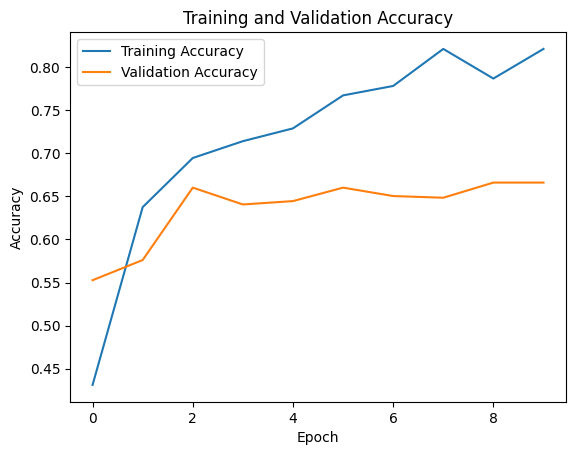

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

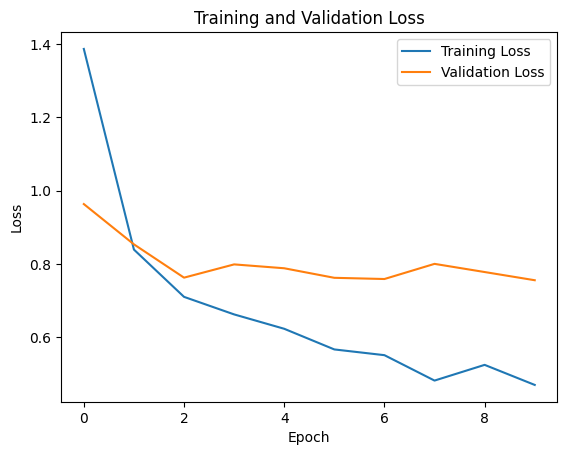

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

12/12 [==============================] - 17s 1s/step


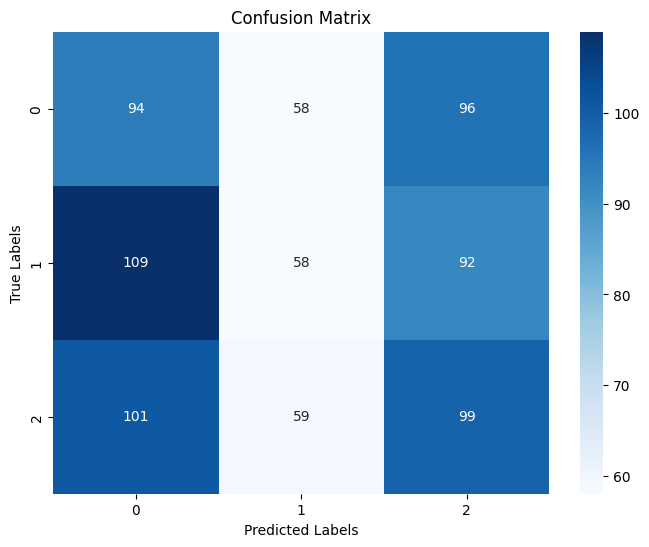


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.38      0.34       248
           1       0.33      0.22      0.27       259
           2       0.34      0.38      0.36       259

    accuracy                           0.33       766
   macro avg       0.33      0.33      0.32       766
weighted avg       0.33      0.33      0.32       766



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_true = validation_generator.classes
y_pred_probabilities = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


# MobileNet

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
model_mb = Sequential()
model_mb.add(base_model)
model_mb.add(GlobalAveragePooling2D())
model_mb.add(Dense(256, activation='relu'))
model_mb.add(Dense(3, activation='softmax'))

In [ ]:
model_mb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_mb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3492035 (13.32 MB)
Trainable params: 3470147 (13.24 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [ ]:
history33 = model_mb.fit(training_generator,
                       steps_per_epoch=len(training_generator),
                       epochs=10,
                       validation_data=validation_generator,
                       validation_steps=len(validation_generator))

Epoch 1/10
48/48 [==============================] - 79s 1s/step - loss: 0.8360 - accuracy: 0.6676 - val_loss: 2.1619 - val_accuracy: 0.4556
Epoch 2/10
48/48 [==============================] - 59s 1s/step - loss: 0.4548 - accuracy: 0.8083 - val_loss: 1.0558 - val_accuracy: 0.6397
Epoch 3/10
48/48 [==============================] - 55s 1s/step - loss: 0.3633 - accuracy: 0.8574 - val_loss: 1.1963 - val_accuracy: 0.6384
Epoch 4/10
48/48 [==============================] - 54s 1s/step - loss: 0.3114 - accuracy: 0.8691 - val_loss: 0.7314 - val_accuracy: 0.7180
Epoch 5/10
48/48 [==============================] - 54s 1s/step - loss: 0.2959 - accuracy: 0.8857 - val_loss: 0.6917 - val_accuracy: 0.7206
Epoch 6/10
48/48 [==============================] - 54s 1s/step - loss: 0.2224 - accuracy: 0.9189 - val_loss: 1.6686 - val_accuracy: 0.5039
Epoch 7/10
48/48 [==============================] - 55s 1s/step - loss: 0.2159 - accuracy: 0.9173 - val_loss: 0.9051 - val_accuracy: 0.7154
Epoch 8/10
48/48 [==

In [ ]:
model_mb.save('/content/drive/MyDrive/Neckline_MobileNet_Oversampling.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


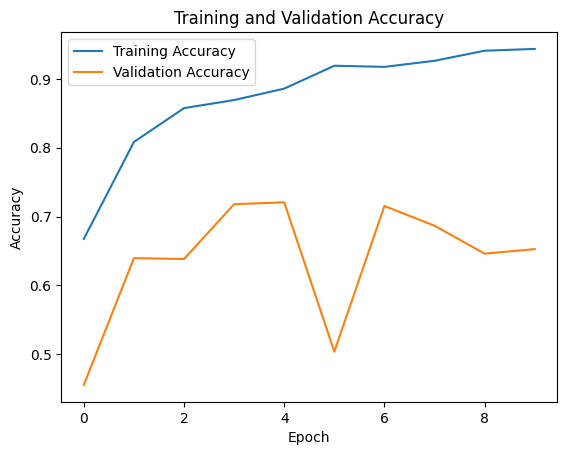

In [ ]:
plt.plot(history33.history['accuracy'], label='Training Accuracy')
plt.plot(history33.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

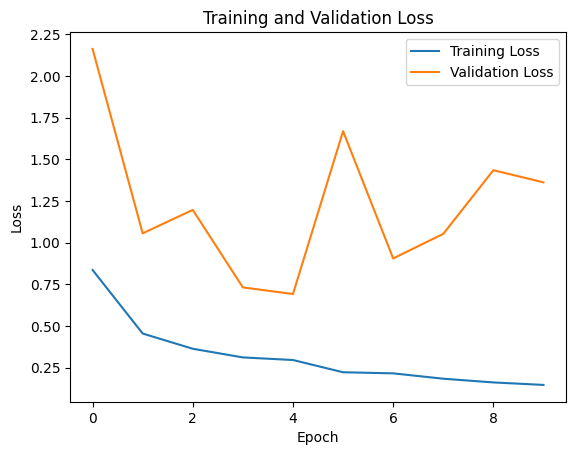

In [ ]:
plt.plot(history33.history['loss'], label='Training Loss')
plt.plot(history33.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

12/12 [==============================] - 4s 333ms/step


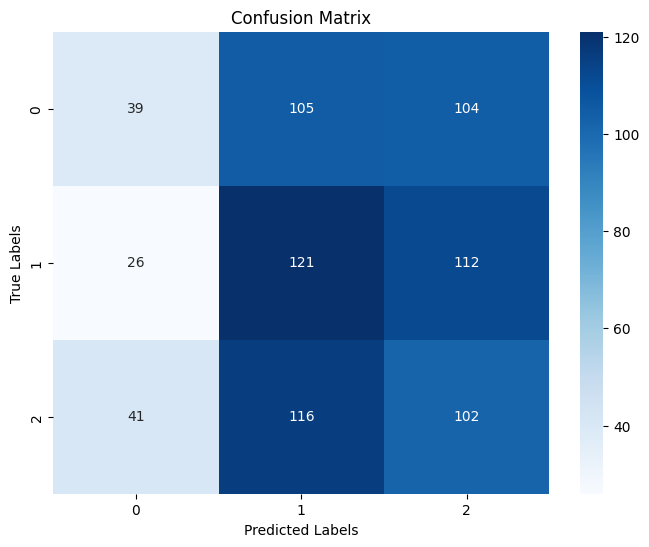


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.16      0.22       248
           1       0.35      0.47      0.40       259
           2       0.32      0.39      0.35       259

    accuracy                           0.34       766
   macro avg       0.35      0.34      0.33       766
weighted avg       0.35      0.34      0.33       766



In [ ]:
y_true = validation_generator.classes
y_pred_probabilities = model_mb.predict(validation_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# ResNet50

In [ ]:
import os
import glob
import zipfile
import seaborn as sb
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.metrics import confusion_matrix,classification_report
from keras.optimizers import Adam

In [ ]:
resnet = ResNet50(weights='imagenet',
                      input_shape= (224,224,3),
                      include_top= False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
inputs = resnet.input

x = resnet.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

outputs = Dense(3, activation ='softmax')(x)

model_resnet = Model(inputs=inputs, outputs=outputs)

In [ ]:
layers = resnet.layers
for layer in layers:
    layer.trainable = False

model_resnet.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history_res = model_resnet.fit_generator(
    training_generator,
    epochs= 10,
    validation_data = validation_generator,
    validation_steps = 10,
    steps_per_epoch = 20
    )

<ipython-input-40-33ca7faf45ca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_res = model_resnet.fit_generator(


Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 1.3979 - accuracy: 0.3281 - val_loss: 1.0975 - val_accuracy: 0.3547
Epoch 2/10
20/20 [==============================] - 25s 1s/step - loss: 1.1628 - accuracy: 0.3586 - val_loss: 1.0956 - val_accuracy: 0.3859
Epoch 3/10
20/20 [==============================] - 26s 1s/step - loss: 1.1204 - accuracy: 0.3461 - val_loss: 1.1022 - val_accuracy: 0.3641
Epoch 4/10
20/20 [==============================] - 26s 1s/step - loss: 1.1039 - accuracy: 0.3594 - val_loss: 1.0913 - val_accuracy: 0.3859
Epoch 5/10
20/20 [==============================] - 32s 2s/step - loss: 1.0998 - accuracy: 0.3477 - val_loss: 1.0910 - val_accuracy: 0.3578
Epoch 6/10
20/20 [==============================] - 26s 1s/step - loss: 1.0958 - accuracy: 0.3477 - val_loss: 1.0830 - val_accuracy: 0.4125
Epoch 7/10
20/20 [==============================] - 24s 1s/step - loss: 1.0911 - accuracy: 0.3727 - val_loss: 1.0937 - val_accuracy: 0.3391
Epoch 8/10
20/20 [==

In [ ]:
model_resnet.save('/content/drive/MyDrive/Neckline_ResNet50_Oversampling.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


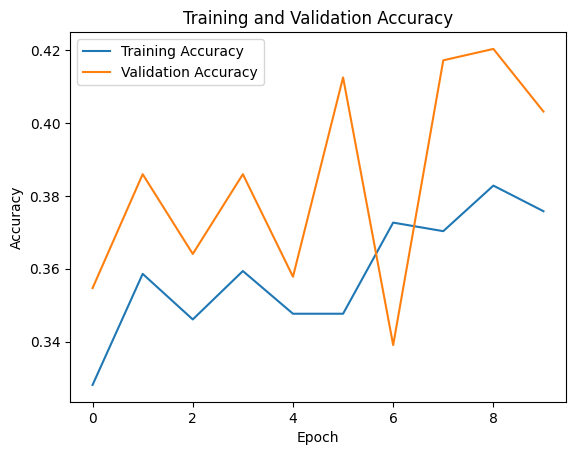

In [ ]:
plt.plot(history_res.history['accuracy'], label='Training Accuracy')
plt.plot(history_res.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

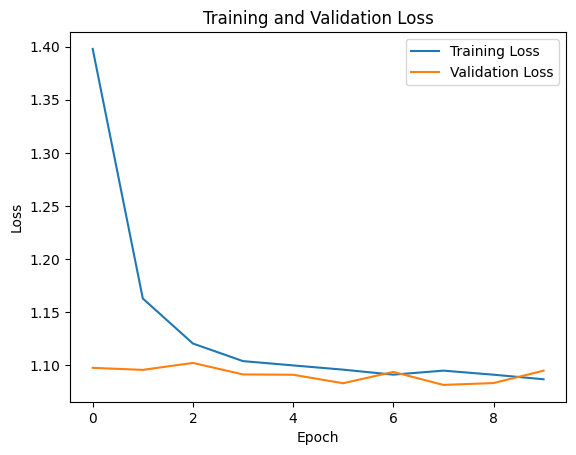

In [ ]:
plt.plot(history_res.history['loss'], label='Training Loss')
plt.plot(history_res.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

12/12 [==============================] - 10s 566ms/step


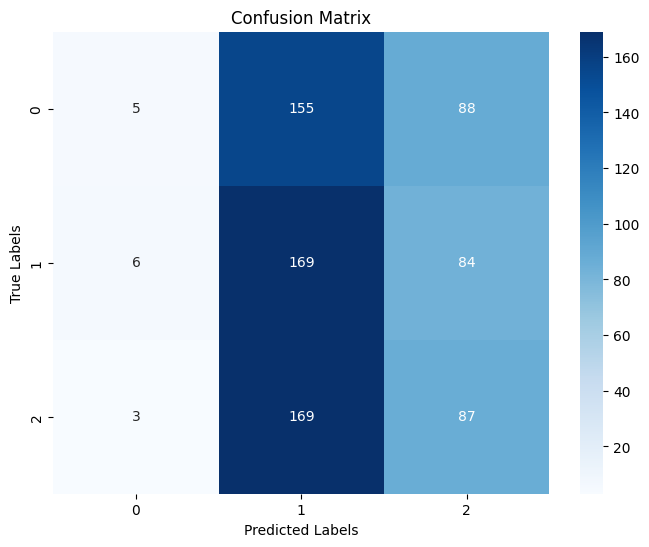


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.02      0.04       248
           1       0.34      0.65      0.45       259
           2       0.34      0.34      0.34       259

    accuracy                           0.34       766
   macro avg       0.35      0.34      0.27       766
weighted avg       0.35      0.34      0.28       766



In [ ]:
y_true = validation_generator.classes
y_pred_probabilities = model_resnet.predict(validation_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))